In [8]:
import pandas as pd

# Memuat dataset dari path file yang ditentukan
file_path = '/content/RegresiUTSTelkomNEW.csv'
dataset = pd.read_csv(file_path)

# Menampilkan beberapa baris awal untuk menganalisis struktur dataset
dataset.head()

,x2,x4,x7,x37,x41,x47,x48,x54,x58,x64,x68,x74,x1
0,48.73215,70.32679,-24.83777,26.84939,202.18689,-12.19034,-125.94783,70.99515,79.95420,12.59163,-88.37882,13.88281,2001
1,50.95714,55.81851,-18.54940,28.70107,13.09302,-7.27994,133.08169,24.26629,194.74034,1.75729,-12.14279,-39.98887,2001
2,48.24750,36.29772,-26.21683,35.63919,-0.01744,-7.20736,778.02248,4.15159,82.46573,-11.63176,-83.15795,24.37468,2001
3,50.97020,67.09964,-16.81409,11.20673,28.68782,-15.55296,150.29661,27.88782,41.17343,-4.05003,-47.75605,54.53513,2001
4,50.54767,92.35066,-19.04928,20.84154,51.41086,-9.11273,-31.97030,17.53456,-15.01731,0.51657,-9.41185,5.00362,2001


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Menghasilkan statistik dasar dan mentranspose laporan untuk keterbacaan yang lebih baik
eda_report = dataset.describe().transpose()

# Mengidentifikasi nilai yang hilang dalam dataset
missing_values = dataset.isnull().sum()

# Menampilkan laporan EDA dan jumlah nilai yang hilang
eda_report, missing_values

# Pratinjau baris awal untuk menganalisis struktur dataset
dataset.head()

,x2,x4,x7,x37,x41,x47,x48,x54,x58,x64,x68,x74,x1
0,48.73215,70.32679,-24.83777,26.84939,202.18689,-12.19034,-125.94783,70.99515,79.95420,12.59163,-88.37882,13.88281,2001
1,50.95714,55.81851,-18.54940,28.70107,13.09302,-7.27994,133.08169,24.26629,194.74034,1.75729,-12.14279,-39.98887,2001
2,48.24750,36.29772,-26.21683,35.63919,-0.01744,-7.20736,778.02248,4.15159,82.46573,-11.63176,-83.15795,24.37468,2001
3,50.97020,67.09964,-16.81409,11.20673,28.68782,-15.55296,150.29661,27.88782,41.17343,-4.05003,-47.75605,54.53513,2001
4,50.54767,92.35066,-19.04928,20.84154,51.41086,-9.11273,-31.97030,17.53456,-15.01731,0.51657,-9.41185,5.00362,2001


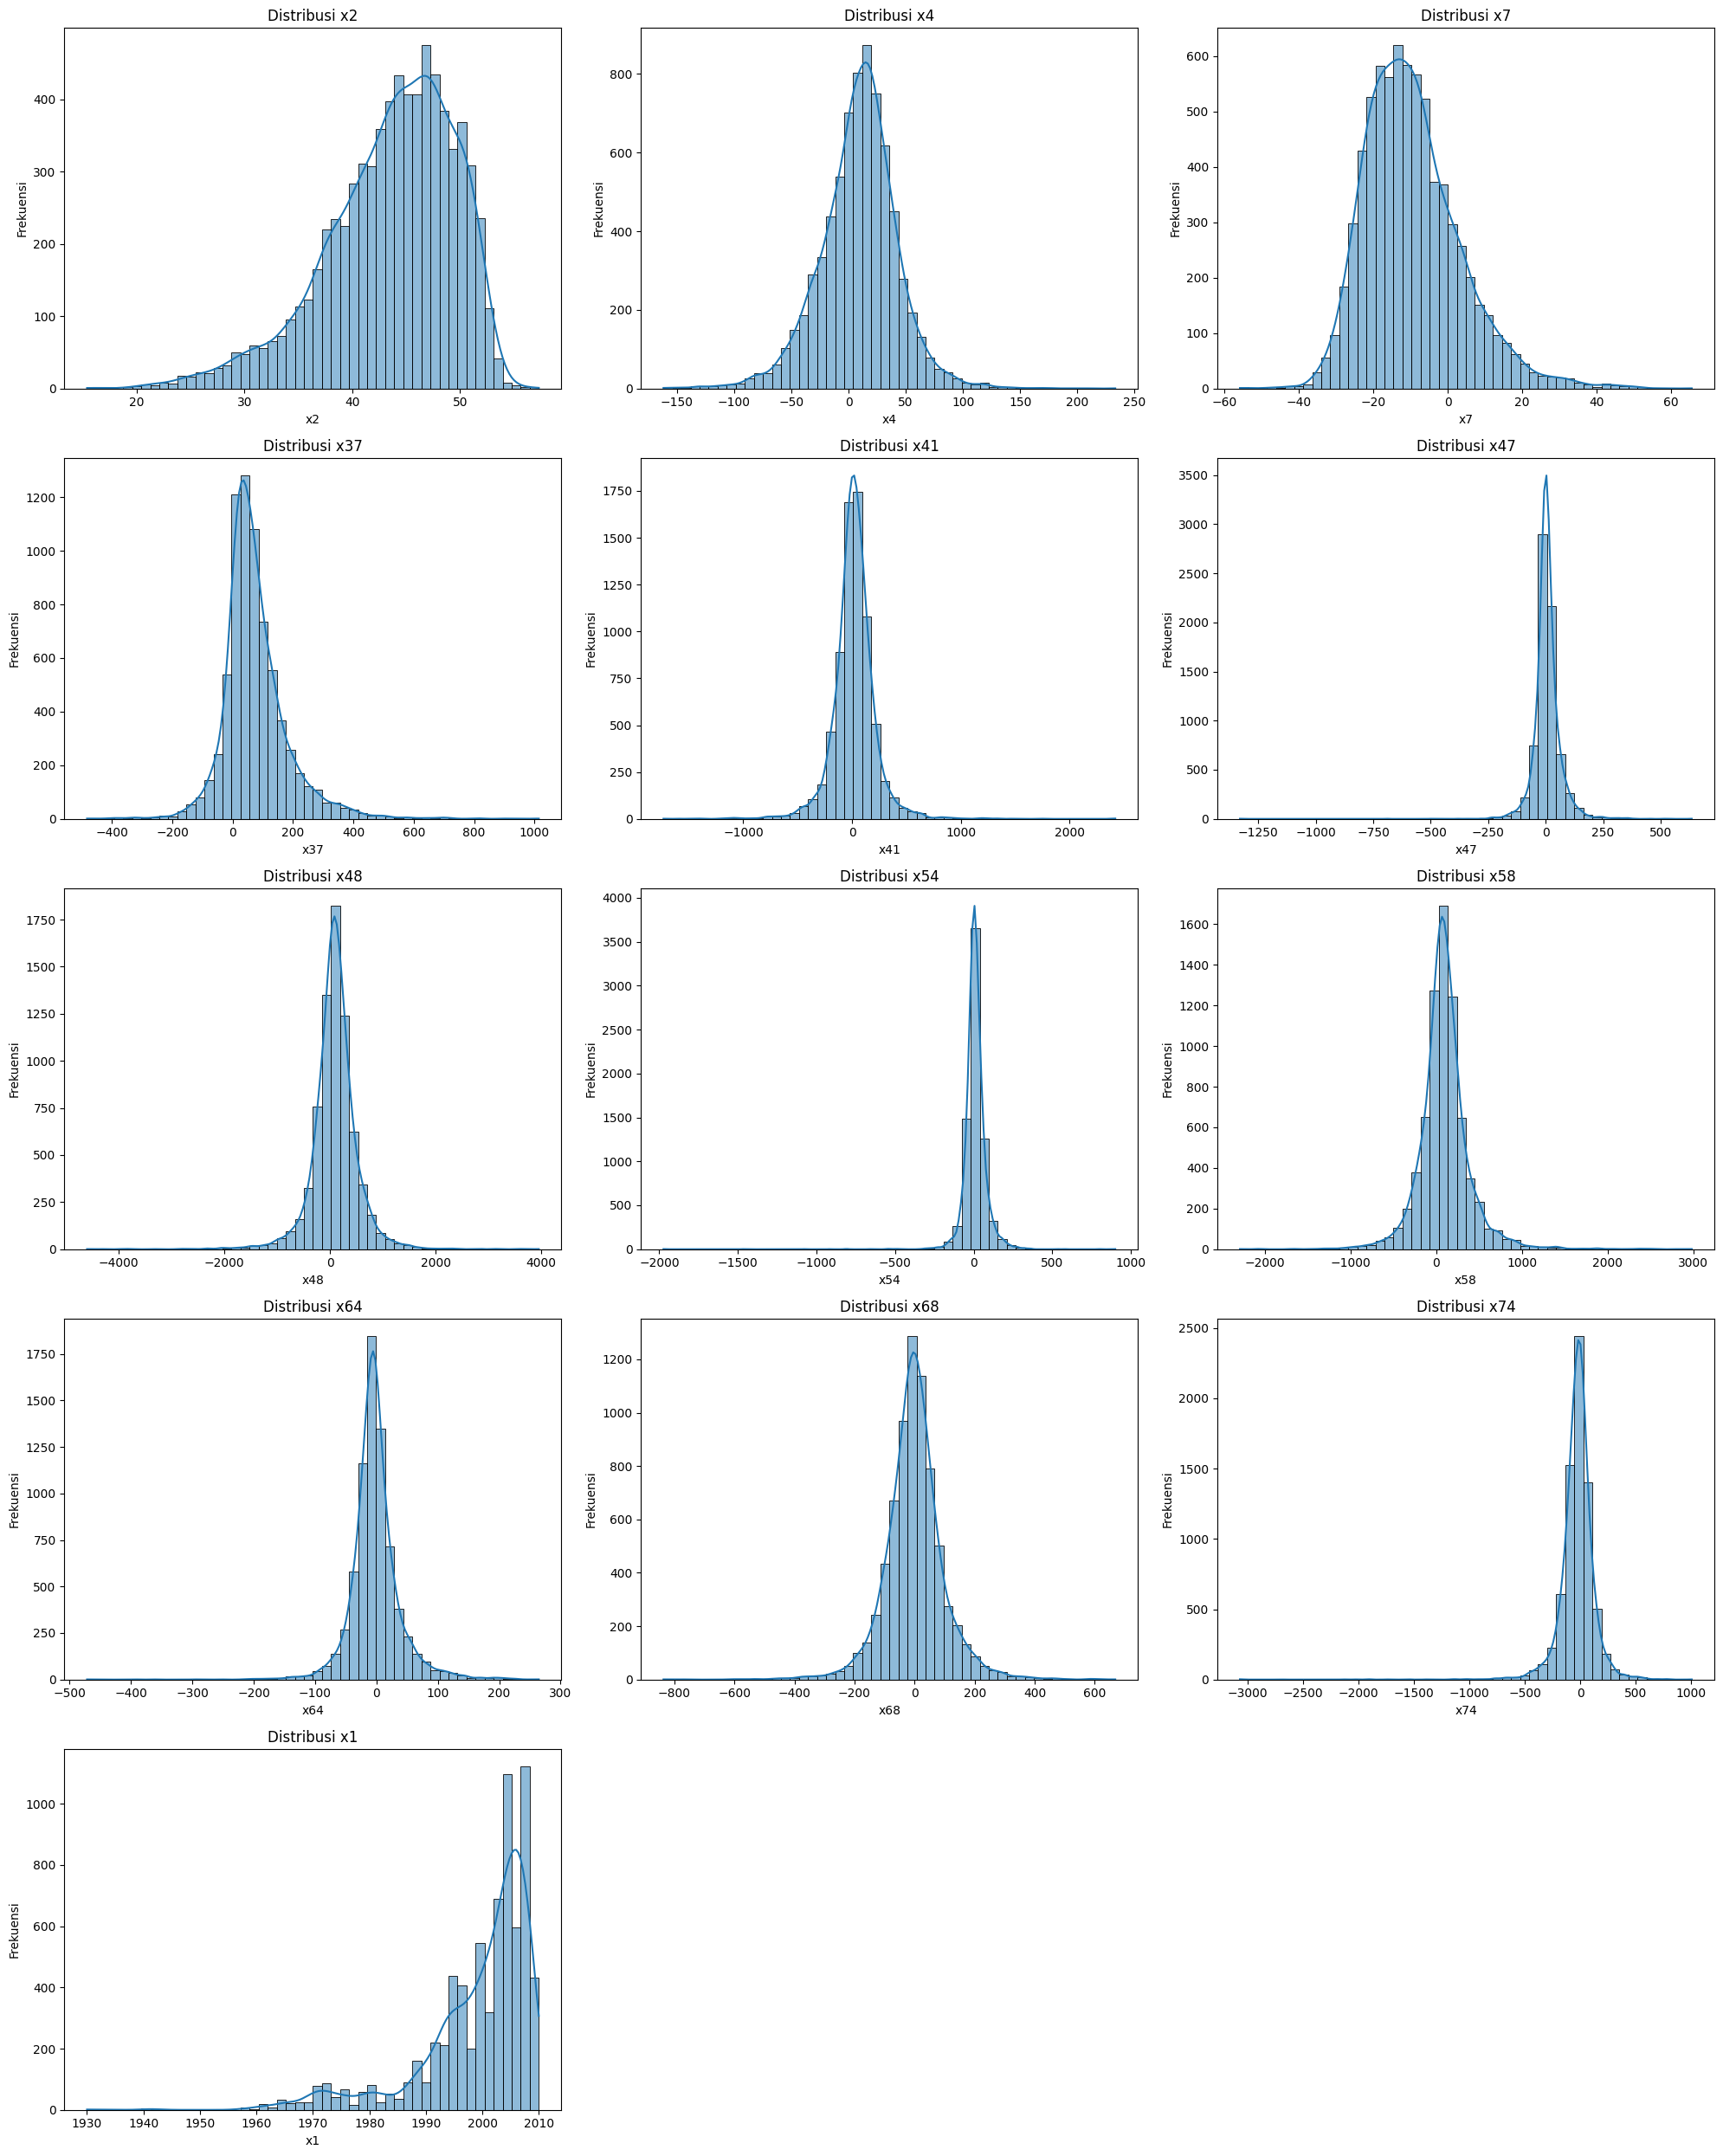

In [12]:
# Visualisasikan distribusi fitur numerik dalam dataset
numerical_cols = dataset.columns

# Adjust the figure size and subplot layout to accommodate all columns
num_cols = len(numerical_cols)
num_rows = (num_cols + 2) // 3  # Calculate rows needed, add 2 to ensure enough space
plt.figure(figsize=(20, 5 * num_rows))  # Adjust figure height based on rows

for idx, col in enumerate(numerical_cols, 1):
    # Plot distribusi setiap fitur numerik menggunakan histogram dan KDE
    plt.subplot(num_rows, 3, idx)  # Use calculated rows and 3 columns
    sns.histplot(dataset[col], kde=True, bins=50)
    plt.title(f'Distribusi {col}')
    plt.xlabel(col)
    plt.ylabel('Frekuensi')
# Sesuaikan tata letak untuk mencegah tumpang tindih dan tampilkan plot
plt.tight_layout()
plt.show()

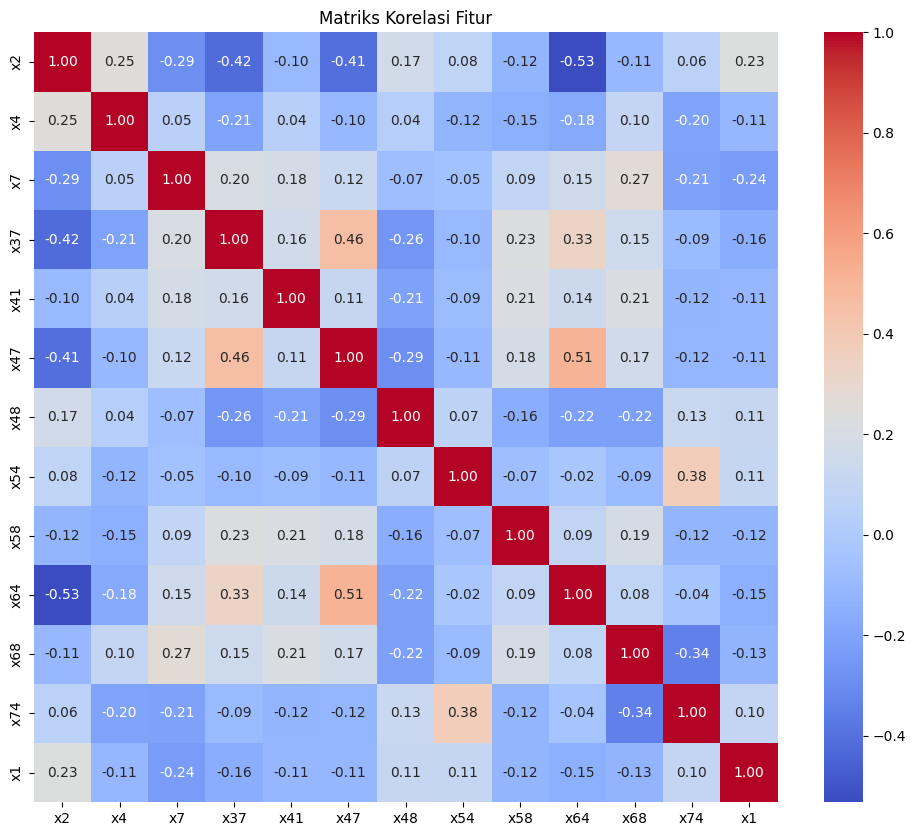

In [13]:
# Hitung matriks korelasi untuk dataset
correlation_matrix = dataset.corr()

# Buat heatmap untuk memvisualisasikan matriks korelasi
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriks Korelasi Fitur")
plt.show()

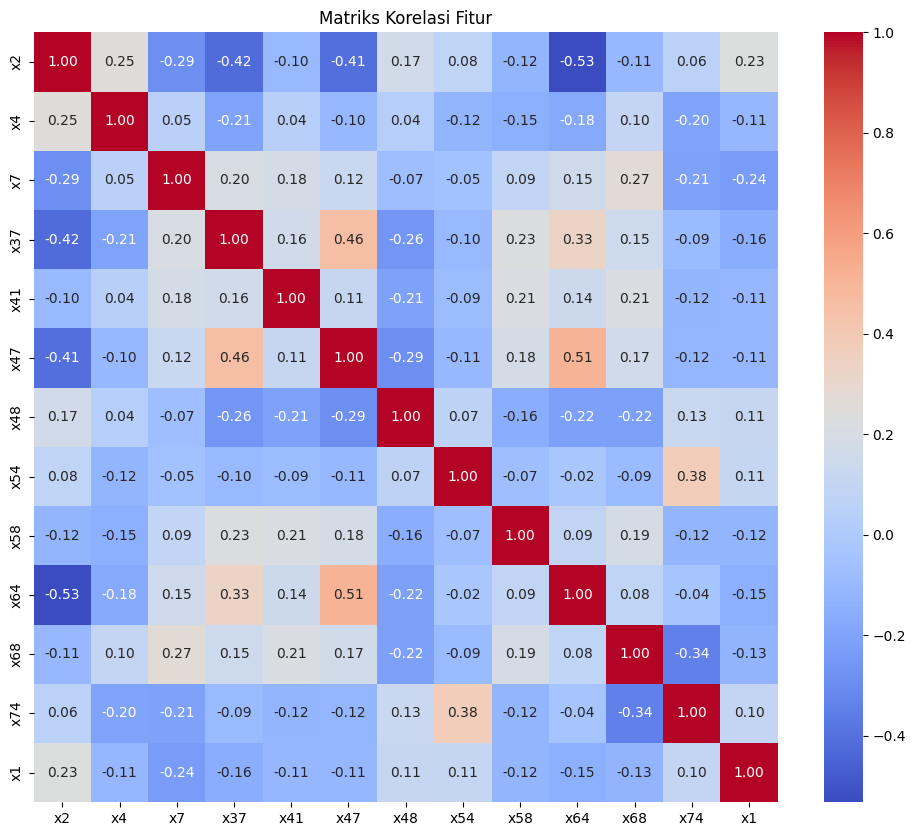

In [14]:
# Hitung ulang matriks korelasi untuk dataset
correlation_matrix = dataset.corr()

# Plot matriks korelasi untuk visualisasi yang lebih baik
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriks Korelasi Fitur")
plt.show()

In [17]:
# Import library yang diperlukan
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.impute import SimpleImputer # Import SimpleImputer for handling NaNs


# Memuat dataset dari file path yang ditentukan
file_path = '/content/RegresiUTSTelkomNEW.csv'  # Ganti dengan path file Anda
dataset = pd.read_csv(file_path)

# Memisahkan fitur (X) dan variabel target (y)
X = dataset.drop(columns=['x1'])  # Diasumsikan 'x1' adalah kolom target
y = dataset['x1']

# Membagi data menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Membuat pipeline untuk setiap model
pipelines = {
    "Polynomial Regression": Pipeline([
        ('imputer', SimpleImputer(strategy='mean')), # Added Imputer to handle NaNs
        ('poly', PolynomialFeatures()),  # Menghasilkan fitur polinomial dan interaksi
        ('scaler', StandardScaler()),  # Normalisasi fitur
        ('model', LinearRegression())  # Model regresi linear
    ]),
    "Decision Tree": Pipeline([
        ('imputer', SimpleImputer(strategy='mean')), # Added Imputer to handle NaNs
        ('model', DecisionTreeRegressor(random_state=42))  # Model decision tree
    ]),
    "k-NN": Pipeline([
        ('imputer', SimpleImputer(strategy='mean')), # Added Imputer to handle NaNs
        ('scaler', StandardScaler()),  # Normalisasi fitur
        ('model', KNeighborsRegressor())  # Model k-NN regressor
    ])
}

# Mendefinisikan grid hyperparameter untuk setiap model
param_grids = {
    "Polynomial Regression": {'poly__degree': [1, 2, 3]},  # Menyesuaikan derajat polinomial
    "Decision Tree": {'model__max_depth': [5, 10, 20],  # Menyesuaikan kedalaman maksimum tree
                      'model__min_samples_split': [2, 5, 10]},  # Menyesuaikan jumlah minimum sampel untuk split
    "k-NN": {'model__n_neighbors': [3, 5, 10]}  # Menyesuaikan jumlah tetangga pada k-NN
}

# Melakukan grid search untuk setiap model
evaluation_results = []
for model_name, pipeline in pipelines.items():
    # Melakukan Grid Search
    grid_search = GridSearchCV(pipeline, param_grids[model_name], cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
    grid_search.fit(X_train, y_train)

    # Mendapatkan model terbaik dari grid search
    best_model = grid_search.best_estimator_

    # Membuat prediksi pada set pengujian
    y_pred = best_model.predict(X_test)

    # Menghitung metrik evaluasi
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Menyimpan hasil evaluasi
    evaluation_results.append({
        "Model": model_name,
        "Best Parameters": grid_search.best_params_,
        "MSE": mse,
        "MAE": mae,
        "R²": r2
    })

# Mengubah hasil menjadi DataFrame dan menampilkannya
evaluation_df = pd.DataFrame(evaluation_results)
print("Hasil Evaluasi Model:")
print(evaluation_df)

Hasil Evaluasi Model:
                   Model                                    Best Parameters  \
0  Polynomial Regression                                {'poly__degree': 1}   
1          Decision Tree  {'model__max_depth': 5, 'model__min_samples_sp...   
2                   k-NN                         {'model__n_neighbors': 10}   

         MSE       MAE        R²  
0  94.153502  7.036103  0.154716  
1  92.001577  6.796539  0.174036  
2  90.916521  6.908339  0.183777  


In [33]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.impute import SimpleImputer  # Import SimpleImputer untuk menangani missing values
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import pandas as pd

# Fungsi untuk menghitung metrik evaluasi untuk model
def evaluate_model(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return mse, rmse, mae, r2

# Pipeline untuk Regresi Polinomial dengan penanganan missing values
poly_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),  # Menangani missing values dengan rata-rata
    ('poly', PolynomialFeatures()),
    ('scaler', StandardScaler()),
    ('model', LinearRegression())
])
poly_param_grid = {
    'poly__degree': [2, 3, 4],  # Derajat polinomial yang akan diuji
    'model__fit_intercept': [True, False]  # Apakah akan menggunakan intercept atau tidak
}
poly_grid = GridSearchCV(poly_pipeline, poly_param_grid, cv=5, scoring='neg_mean_squared_error')
poly_grid.fit(X_train, y_train)
poly_best_model = poly_grid.best_estimator_
poly_y_pred = poly_best_model.predict(X_test)
poly_mse, poly_rmse, poly_mae, poly_r2 = evaluate_model(y_test, poly_y_pred)
print("\nMetrik Model Regresi Polinomial Terbaik:")
print(f"MSE: {poly_mse:.4f}, RMSE: {poly_rmse:.4f}, MAE: {poly_mae:.4f}, R^2: {poly_r2:.4f}")

# Model Decision Tree dengan penanganan missing values
tree_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),  # Menangani missing values dengan rata-rata
    ('model', DecisionTreeRegressor(random_state=42))
])
tree_param_grid = {
    'model__max_depth': [3, 5, 10, None],  # Kedalaman maksimum pohon keputusan
    'model__min_samples_split': [2, 5, 10],  # Jumlah minimum sampel untuk membagi node
    'model__min_samples_leaf': [1, 2, 4]  # Jumlah minimum sampel di setiap daun
}
tree_grid = GridSearchCV(tree_pipeline, tree_param_grid, cv=5, scoring='neg_mean_squared_error')
tree_grid.fit(X_train, y_train)
tree_best_model = tree_grid.best_estimator_
tree_y_pred = tree_best_model.predict(X_test)
tree_mse, tree_rmse, tree_mae, tree_r2 = evaluate_model(y_test, tree_y_pred)
print("\nMetrik Model Pohon Keputusan Terbaik:")
print(f"MSE: {tree_mse:.4f}, RMSE: {tree_rmse:.4f}, MAE: {tree_mae:.4f}, R^2: {tree_r2:.4f}")

# Model k-Nearest Neighbors dengan penanganan missing values
knn_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),  # Menangani missing values dengan rata-rata
    ('model', KNeighborsRegressor())
])
knn_param_grid = {
    'model__n_neighbors': [3, 5, 10],  # Jumlah tetangga yang akan dipertimbangkan
    'model__weights': ['uniform', 'distance'],  # Metode pembobotan
    'model__metric': ['euclidean', 'manhattan']  # Metode pengukuran jarak
}
knn_grid = GridSearchCV(knn_pipeline, knn_param_grid, cv=5, scoring='neg_mean_squared_error')
knn_grid.fit(X_train, y_train)
knn_best_model = knn_grid.best_estimator_
knn_y_pred = knn_best_model.predict(X_test)
knn_mse, knn_rmse, knn_mae, knn_r2 = evaluate_model(y_test, knn_y_pred)
print("\nMetrik Model k-Nearest Neighbors Terbaik:")
print(f"MSE: {knn_mse:.4f}, RMSE: {knn_rmse:.4f}, MAE: {knn_mae:.4f}, R^2: {knn_r2:.4f}")

# Model XGBoost dengan penanganan missing values
xgb_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),  # Menangani missing values dengan rata-rata
    ('model', XGBRegressor(random_state=42, eval_metric='rmse'))
])
xgb_param_grid = {
    'model__n_estimators': [50, 100, 200],  # Jumlah pohon dalam model
    'model__learning_rate': [0.01, 0.1, 0.2],  # Laju pembelajaran
    'model__max_depth': [3, 5, 7],  # Kedalaman maksimum pohon
    'model__subsample': [0.8, 1.0],  # Rasio sampel yang digunakan untuk pelatihan
    'model__colsample_bytree': [0.8, 1.0]  # Rasio fitur yang digunakan untuk setiap pohon
}
xgb_grid = GridSearchCV(xgb_pipeline, xgb_param_grid, cv=5, scoring='neg_mean_squared_error')
xgb_grid.fit(X_train, y_train)
xgb_best_model = xgb_grid.best_estimator_
xgb_y_pred = xgb_best_model.predict(X_test)
xgb_mse, xgb_rmse, xgb_mae, xgb_r2 = evaluate_model(y_test, xgb_y_pred)
print("\nMetrik Model XGBoost Terbaik:")
print(f"MSE: {xgb_mse:.4f}, RMSE: {xgb_rmse:.4f}, MAE: {xgb_mae:.4f}, R^2: {xgb_r2:.4f}")


Metrik Model Regresi Polinomial Terbaik:
MSE: 93.6674, RMSE: 9.6782, MAE: 6.8563, R^2: 0.1591

Metrik Model Pohon Keputusan Terbaik:
MSE: 91.9910, RMSE: 9.5912, MAE: 6.8042, R^2: 0.1741

Metrik Model k-Nearest Neighbors Terbaik:
MSE: 105.7558, RMSE: 10.2838, MAE: 7.4475, R^2: 0.0506

Metrik Model XGBoost Terbaik:
MSE: 84.8289, RMSE: 9.2103, MAE: 6.5555, R^2: 0.2384
